In [1]:
from sympy import *
init_printing(use_unicode=True)

# Kinetic Model

Defining symbolic variables and functions objects

In [2]:
T, k10, k20, R, Ea1, Ea2, x, Cao = symbols('T k10 k20 R Ea1 Ea2 x Cao', positive=True, real=True)
k1, k2, Ca, Cb, r, Xopt , ropt = symbols('k1 k2 Ca Cb r Xopt ropt', cls=Function)

Kinetic expressions

In [3]:
eq1 = Eq(k1(T), k10 * exp(-Ea1/(R*T)))
eq2 = Eq(k2(T), k20 * exp(-Ea2/(R*T)))

In [4]:
eq3 = Eq(Ca(x), Cao * (1 - x))
eq4 = Eq(Cb(x), Cao * x)

Global reaction rate for the reversible reaction

In [5]:
global_rate = Eq(r(T,x), k1(T) * Ca(x) - k2(T) * Cb(x))

In [6]:
global_rate

Let's put all together

In [7]:
eq5=global_rate.subs({eq1.lhs:eq1.rhs, eq2.lhs:eq2.rhs,
                 eq3.lhs:eq3.rhs, eq4.lhs:eq4.rhs})

In [8]:
eq5

# Optimal fractional conversion

The above equation is derived to T, keeping the conversion constant to determine the maximum velocity value.

In [9]:
eq6 = Eq(Derivative(eq5.lhs, T), Derivative(eq5.rhs, T).doit())

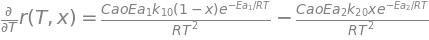

In [10]:
eq6

Finding the optimal X value

In [11]:
eq7 = Eq(Xopt(T), solve(eq6.rhs, x)[0])

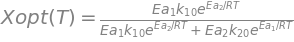

In [12]:
eq7

# Finding the maximum reaction rate

Substituting Eq7 to Eq5, we will get the maximum reaction rate expression

In [13]:
eq8 = Eq(ropt(T), simplify(eq5.rhs.subs(x, eq7.rhs)))

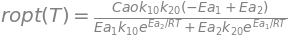

In [14]:
eq8

It is possible to simplify more the last equation including the definition of Chemical equilibrium constant